<a href="https://colab.research.google.com/github/20hnu/ml_projects/blob/main/Flood_Probability_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/collab notebooks/flood predictor/train.csv")

In [ ]:
df.head(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/collab notebooks/flood predictor/test.csv")

In [ ]:
df_test.head(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [ ]:
df.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [ ]:
df.duplicated().sum()

0

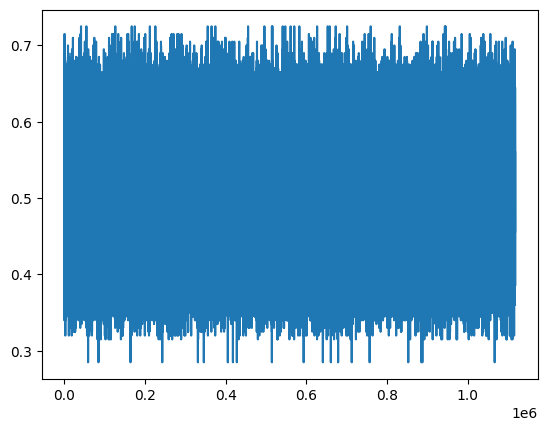

In [ ]:
plt.plot(df[df.columns[0]],  df["FloodProbability"])

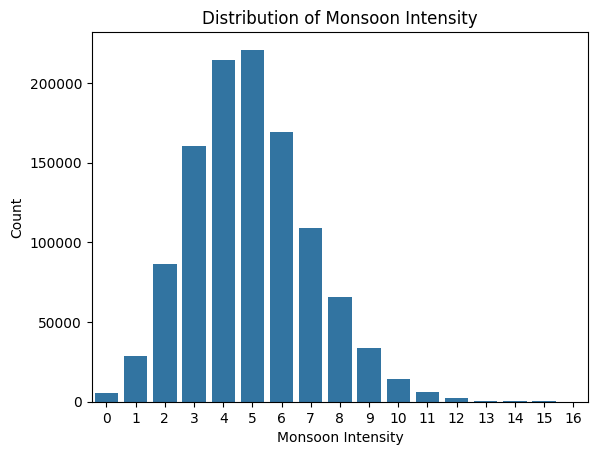

In [ ]:
sns.countplot(data=df, x='MonsoonIntensity')
plt.title('Distribution of Monsoon Intensity')
plt.xlabel('Monsoon Intensity')
plt.ylabel('Count')
plt.show()

In [ ]:
df["MonsoonIntensity"].describe()

count    1.117957e+06
mean     4.921450e+00
std      2.056387e+00
min      0.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      6.000000e+00
max      1.600000e+01
Name: MonsoonIntensity, dtype: float64

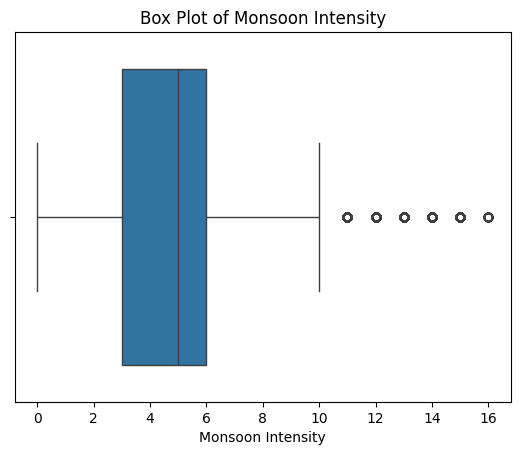

In [ ]:
sns.boxplot(x=df['MonsoonIntensity'])
plt.title('Box Plot of Monsoon Intensity')
plt.xlabel('Monsoon Intensity')
plt.show()

In [ ]:
skewness = df['MonsoonIntensity'].skew()
print(f'Skewness: {skewness}')

Skewness: 0.44452826770475723


In [ ]:
df["MonsoonIntensity"].value_counts().sort_index()

MonsoonIntensity
0       5431
1      28946
2      86683
3     160574
4     214344
5     220936
6     169080
7     109210
8      65954
9      33515
10     14040
11      5851
12      2062
13       729
14       391
15       169
16        42
Name: count, dtype: int64

In [ ]:
df["TopographyDrainage"].value_counts().sort_index()

TopographyDrainage
0       5541
1      29422
2      90058
3     161989
4     213368
5     221252
6     159003
7     102681
8      72000
9      37544
10     15524
11      6177
12      2199
13       705
14       333
15       106
16        42
17        10
18         3
Name: count, dtype: int64

In [ ]:
df1 = df.drop(columns=['id',"FloodProbability"])

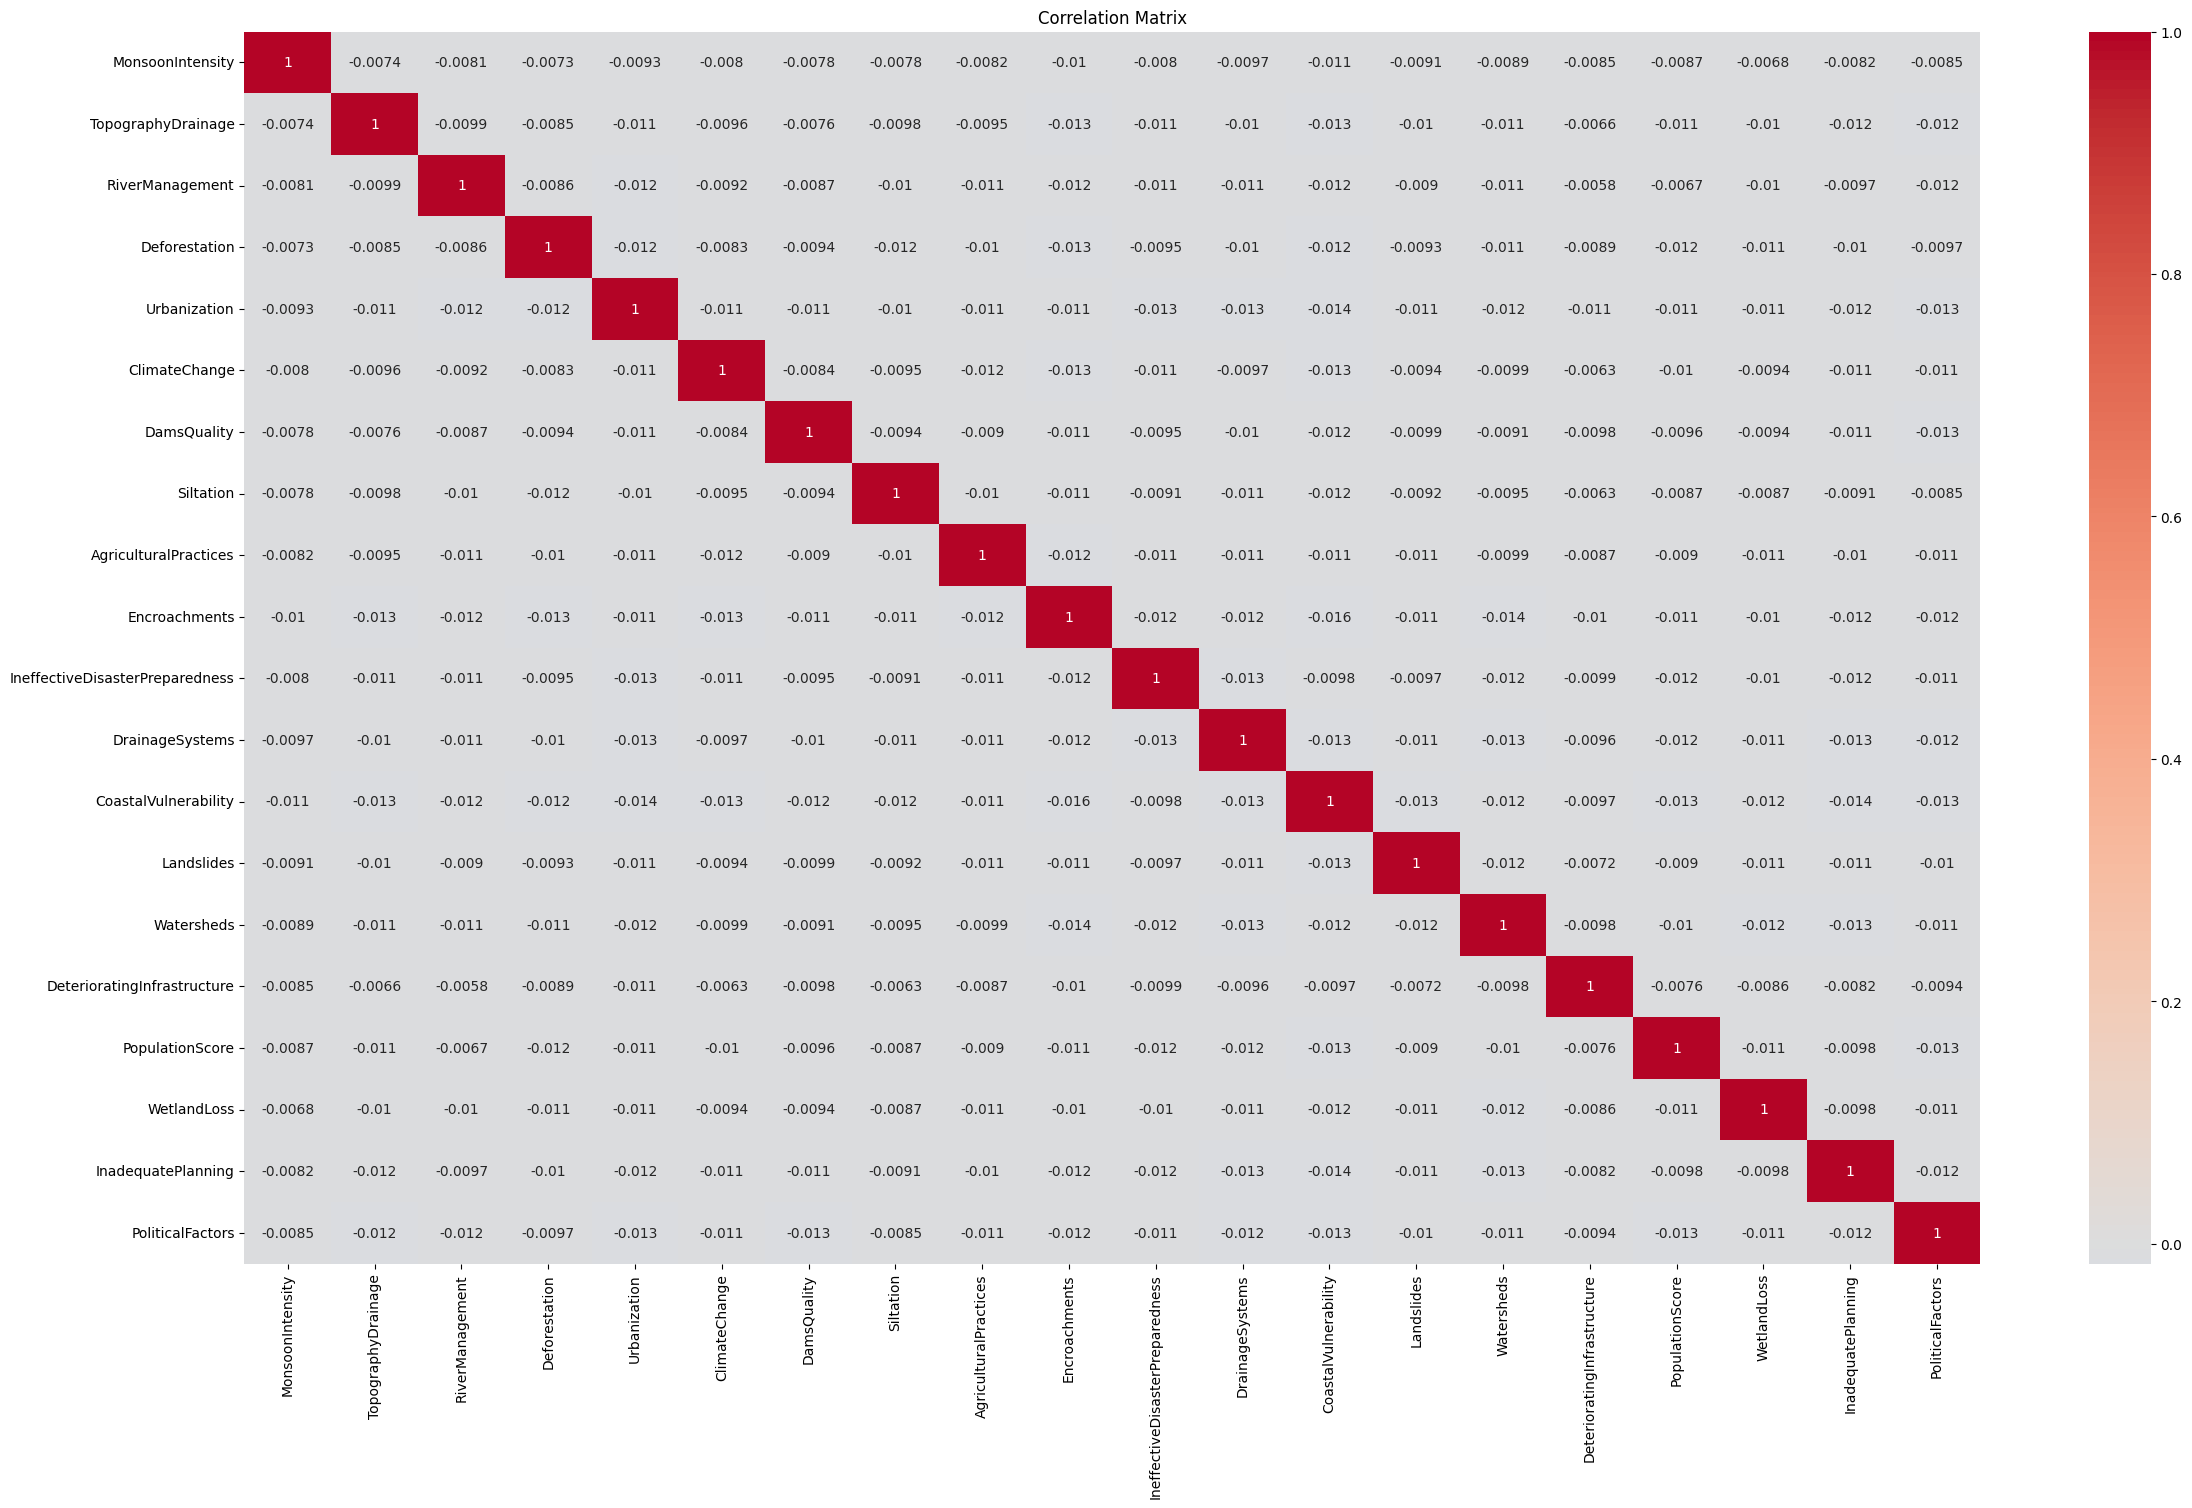

In [ ]:
correlation_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(28, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.columns[1:21]

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns[1:21]
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns[1:21]))]

print('Variance Inflation Factor (VIF) Data:')
print(vif_data)


Variance Inflation Factor (VIF) Data:
                            feature       VIF
0                  MonsoonIntensity  3.920718
1                TopographyDrainage  8.105201
2                   RiverManagement  7.952360
3                     Deforestation  8.136643
4                      Urbanization  8.195011
5                     ClimateChange  8.019369
6                       DamsQuality  8.138728
7                         Siltation  8.084342
8             AgriculturalPractices  8.078824
9                     Encroachments  8.088582
10  IneffectiveDisasterPreparedness  8.023749
11                  DrainageSystems  8.051228
12             CoastalVulnerability  8.064618
13                       Landslides  8.015560
14                       Watersheds  8.025862
15      DeterioratingInfrastructure  7.987825
16                  PopulationScore  8.081852
17                      WetlandLoss  8.056024
18               InadequatePlanning  8.110044
19                 PoliticalFactors  7.998

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called data and features are in X
X = df.drop(columns=['FloodProbability','id'])  # Replace 'target_column' with the actual target column name

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Recalculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)

                            Feature       VIF
0                  MonsoonIntensity  1.001718
1                TopographyDrainage  1.002464
2                   RiverManagement  1.002344
3                     Deforestation  1.002477
4                      Urbanization  1.003128
5                     ClimateChange  1.002400
6                       DamsQuality  1.002310
7                         Siltation  1.002158
8             AgriculturalPractices  1.002531
9                     Encroachments  1.003349
10  IneffectiveDisasterPreparedness  1.002712
11                  DrainageSystems  1.003057
12             CoastalVulnerability  1.003687
13                       Landslides  1.002476
14                       Watersheds  1.002943
15      DeterioratingInfrastructure  1.001758
16                  PopulationScore  1.002549
17                      WetlandLoss  1.002540
18               InadequatePlanning  1.002866
19                 PoliticalFactors  1.003004


In [ ]:
df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [ ]:
X = df.drop(columns=["id","FloodProbability"])
y = df["FloodProbability"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.head(5)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
707567,6,8,4,4,2,4,3,5,4,4,5,2,7,7,6,4,10,4,5,5
599803,4,4,6,5,7,2,0,1,8,1,5,4,3,5,6,4,2,3,8,5
975393,7,8,4,5,6,2,5,4,5,7,7,8,4,6,5,4,5,9,5,3
750720,4,8,5,6,5,4,6,6,2,5,7,6,3,2,4,7,8,6,6,6
939913,3,3,4,7,5,6,6,2,4,4,8,5,4,9,7,3,7,7,4,4


In [ ]:
y_train[0:5]

707567    0.520
599803    0.400
975393    0.550
750720    0.555
939913    0.525
Name: FloodProbability, dtype: float64

In [ ]:
#Scaling should not be done

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

###Lets Use all available algorithms.

# Linear Regression
* Use When: Your data has a linear relationship between the features and the target variable. It’s simple and interpretable.
* Advantages: Easy to interpret coefficients, fast training.
* Disadvantages: Assumes linearity, sensitive to outliers.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

y_pred = linear_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression MSE: {mse}')

Linear Regression MSE: 0.00040315291728603813


In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression MSE: {mse}')

Linear Regression MSE: 0.00040314158753197433


#Ridge Regression
* Use When: You need to handle multicollinearity in your linear regression model. Adds L2 regularization to penalize large coefficients.
* Advantages: Reduces overfitting by shrinking coefficients.
* Disadvantages: Less interpretable than standard linear regression.

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Ridge Regression MSE: {mse}')


Ridge Regression MSE: 0.0004031415877286355


# Lasso Regression
* Use When: You need feature selection along with regularization. Adds L1 regularization, which can shrink some coefficients to zero.
* Advantages: Can produce sparse models with fewer features.
* Disadvantages: Can be unstable when features are highly correlated.

In [ ]:
from sklearn.linear_model import Lasso

# Initialize and train the model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Make predictions
y_pred = lasso_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Lasso Regression MSE: {mse}')


Lasso Regression MSE: 0.0025987788883723847


In [ ]:
X_train_scaled[0]

array([ 0.52408142,  1.46848538, -0.46305905, -0.45946587, -1.41216522,
       -0.45336401, -0.93902907,  0.03562168, -0.45674802, -0.4568454 ,
        0.02593172, -1.4238588 ,  0.97896885,  0.99603749,  0.51310651,
       -0.44808774,  2.44516181, -0.45902993,  0.02839722,  0.03020312])

# Elastic Net Regression
* Use When: You want a balance between Ridge and Lasso regression. It combines L1 and L2 regularization.
* Advantages: Handles multicollinearity and performs feature selection.
* Disadvantages: More complex to tune due to the need for two regularization parameters.

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and train the model
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_reg.fit(X_train, y_train)

# Make predictions
y_pred = elastic_net_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Elastic Net Regression MSE: {mse}')


Elastic Net Regression MSE: 0.0025987788883723847


# Decision Tree Regression
* Use When: Your data has non-linear relationships and you need an interpretable model.
* Advantages: Easy to visualize and interpret, captures non-linear patterns.
* Disadvantages: Prone to overfitting, sensitive to small changes in the data.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Make predictions
y_pred = tree_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Decision Tree Regression MSE: {mse}')


Decision Tree Regression MSE: 0.0024767303605601134


# Random Forest Regression
* Use When: You need a robust model that reduces overfitting compared to a single decision tree.
* Advantages: Reduces overfitting by averaging multiple trees, handles non-linear relationships well.
* Disadvantages: Can be less interpretable than a single decision tree, computationally intensive.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

# Make predictions
y_pred = forest_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest Regression MSE: {mse}')


Random Forest Regression MSE: 0.0009040296419946009


# Gradient Boosting Regression
* Use When: You want to achieve high predictive accuracy. Useful in competitions and complex datasets.
* Advantages: High accuracy, handles non-linear relationships, and feature importance.
* Disadvantages: Can be prone to overfitting, computationally intensive, requires careful tuning.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)

# Make predictions
y_pred = gb_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Gradient Boosting Regression MSE: {mse}')


# Support Vector Regression (SVR)
* Use When: You have a small to medium-sized dataset with complex relationships.
* Advantages: Effective in high-dimensional spaces, robust to overfitting with proper kernel.
* Disadvantages: Not scalable to very large datasets, requires careful parameter tuning.

In [ ]:
from sklearn.svm import SVR

# Initialize and train the model
svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_reg.fit(X_train, y_train)

# Make predictions
y_pred = svr_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Support Vector Regression MSE: {mse}')


Support Vector Regression MSE: 0.0009077013638012041


# K-Nearest Neighbors Regression (KNN)
* Use When: You have a small dataset and you need a simple, non-parametric method.
* Advantages: Simple to understand and implement, makes no assumptions about the data.
* Disadvantages: Computationally expensive with large datasets, sensitive to noise and irrelevant features.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Make predictions
y_pred = knn_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'K-Nearest Neighbors Regression MSE: {mse}')


# XGBoost Regression
* Use When: You need a powerful, flexible model that can handle large datasets and complex patterns.
* Advantages: High performance, handles missing values well, includes regularization.
* Disadvantages: Computationally intensive, can overfit if not properly tuned.

In [ ]:
from xgboost import XGBRegressor

# Initialize and train the model
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred = xgb_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'XGBoost Regression MSE: {mse}')


In [ ]:
df_test

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


In [ ]:
test_data = df_test.drop(columns="id")

In [ ]:
test_data

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,5,4,8,3,5,4,4,5,5,5,5,6,1,3,5,6,4,4,6,6
745301,4,4,2,12,4,3,4,3,5,5,3,7,4,4,3,5,5,3,5,4
745302,5,7,9,5,5,6,7,5,5,3,6,11,3,11,4,5,9,5,5,4
745303,4,7,6,3,5,2,3,8,6,7,6,6,8,6,2,3,8,7,5,5


In [ ]:

# scaler = StandardScaler()
# test_data_scaled = scaler.fit_transform(test_data)

# Make predictions
predictions = linear_reg.predict(test_data)

# Create a DataFrame for the submission
submission = pd.DataFrame({
    'id': df_test['id'],
    'Prediction': predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)


In [ ]:
sub = pd.read_csv("/content/submission.csv")

In [ ]:
sub

,id,Prediction
0,1117957,0.573661
1,1117958,0.455339
2,1117959,0.454772
3,1117960,0.466207
4,1117961,0.466140
...,...,...
745300,1863257,0.477199
745301,1863258,0.449468
745302,1863259,0.624323
745303,1863260,0.550917
